In [41]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.style.use('dark_background')

## Ejercicio 3
Calculamos en primera instancia la divergencia de nuestro potencial para obtener las componentes x e y del campo eléctrico.

$\vec{E} = - \vec{\nabla} \phi = - \vec{\nabla}
\ln{\left(- \frac{L}{2} + x + \left[y^{2} + \left(- \frac{L}{2} + x\right)^{2} \right]^{\frac{1}{2}}\right)} - \ln{\left(\frac{L}{2} + x + \left[y^{2} + \left(\frac{L}{2} + x\right)^{2}\right]^{\frac{1}{2}} \right)}$

Luego derivamos este campo con respecto a la componente x e y.


In [42]:
#devinimos las variables simbolicas
x = sp.Symbol('x', real=True)
y = sp.Symbol('y', real=True)
L = sp.Symbol('L', real=True)
x_p = sp.Symbol('x_p', real=True)

Definimos nuestro potencial con las funciones del módulo sympy para poder derivar simbolicamente.

In [43]:
phi = sp.ln((x-(L/2) + ((x-(L/2))**2 +y**2)**(1/2)))-sp.ln((x+(L/2) + ((x+(L/2))**2 +y**2)**(1/2))) #función de potencial de forma simbólica
phi

log(-L/2 + x + (y**2 + (-L/2 + x)**2)**0.5) - log(L/2 + x + (y**2 + (L/2 + x)**2)**0.5)

Derivamos nuestro potencial respecto a $x$.

In [44]:
comp_x=sp.diff(phi,x) #Derivada en x
comp_x

((-0.5*L + 1.0*x)*(y**2 + (-L/2 + x)**2)**(-0.5) + 1)/(-L/2 + x + (y**2 + (-L/2 + x)**2)**0.5) - ((0.5*L + 1.0*x)*(y**2 + (L/2 + x)**2)**(-0.5) + 1)/(L/2 + x + (y**2 + (L/2 + x)**2)**0.5)

Ahora, derivamos respecto a $y$.

In [45]:
comp_y=sp.diff(phi,y) #Derivada en y
comp_y

1.0*y*(y**2 + (-L/2 + x)**2)**(-0.5)/(-L/2 + x + (y**2 + (-L/2 + x)**2)**0.5) - 1.0*y*(y**2 + (L/2 + x)**2)**(-0.5)/(L/2 + x + (y**2 + (L/2 + x)**2)**0.5)

En efecto, simplificando las expresiones obtenidas anteriormente nuestro campo eléctrico será de la forma.

$\vec{E}(x,y) =   \left[\frac{2}{\sqrt{4y^2-4Lx +4x^2+L^2}} - \frac{2}{\sqrt{4y^2+4Lx +4x^2+L^2}}\right] \hat{i} + \left[\frac{y}{\sqrt{y^2 + \left(-\frac{L}{2}+x\right)^2} \left( -\frac{L}{2} +x+ \sqrt{y^2 + \left( -\frac{L}{2} + x \right)^2}\right)  } - \frac{y}{\sqrt{y^2 + \left(\frac{L}{2}+x\right)^2} \left( \frac{L}{2} +x+ \sqrt{y^2 + \left( \frac{L}{2} + x \right)^2}\right)  } \right]\hat{j} $


## Ejercicio 4
Grafiquemos el campo eléctrico obtenido con las expresiones anteriores.

In [46]:
##CAMPO ELECTRICO##

n = 40 #nodos de la grilla
max = 20 #maximo y minimo del grafico

X = np.linspace(-max,max,n)
Y = np.linspace(-max,max,n)
L = 10  #Largo de la línea de carga

x,y = np.meshgrid(X,Y)

A continuación definimos las funciones para las componentes del campo eléctrico y su normalización

In [47]:
def Ex(x,y): #componente x del campo
    return ((-0.5*L + 1.0*x)*(y**2 + (-L/2 + x)**2)**(-0.5) + 1)/(-L/2 + x + (y**2 + (-L/2 + x)**2)**0.5) - ((0.5*L + 1.0*x)*(y**2 + (L/2 + x)**2)**(-0.5) + 1)/(L/2 + x + (y**2 + (L/2 + x)**2)**0.5)
    #la expresión anterior se obtiene al hacer que el output de sympy nos de la expresión para el campo en un texto 'plano'

def Ey(x,y): #componente y del campo
    return 1.0*y*(y**2 + (-L/2 + x)**2)**(-0.5)/(-L/2 + x + (y**2 + (-L/2 + x)**2)**0.5) - 1.0*y*(y**2 + (L/2 + x)**2)**(-0.5)/(L/2 + x + (y**2 + (L/2 + x)**2)**0.5)

def E(x,y): #normalización
    return np.sqrt((Ex(x,y))**2 + (Ey(x,y))**2)

Obtenemos la primera figura para el campo eléctrico.

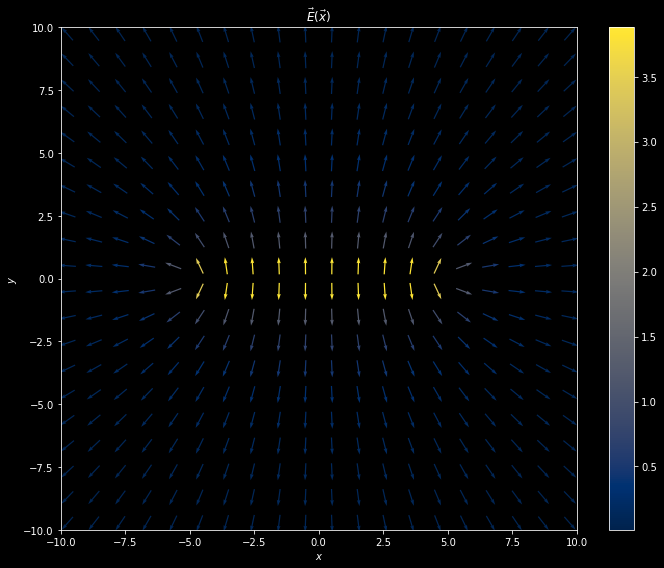

In [48]:
plt.figure(figsize=(10,8))
plt.quiver(x,y, Ex(x,y)/E(x,y),Ey(x,y)/E(x,y),E(x,y), scale=30, pivot='middle', cmap= 'cividis')
plt.ylabel(r'$y$')
plt.xlabel(r'$x$')
plt.colorbar()
plt.xlim(-10,10)#limites arbitrarios para una mejor visualización del campo
plt.ylim(-10,10)
plt.title(r'$\vec{E}(\vec{x})$')
plt.tight_layout()
plt.savefig('ejercicio4.pdf', format='pdf', dpi=300)

## Ejercicio 5
Utilizando el gráfico anterior, ploteamos las líneas de campo encima del campo eléctrico.

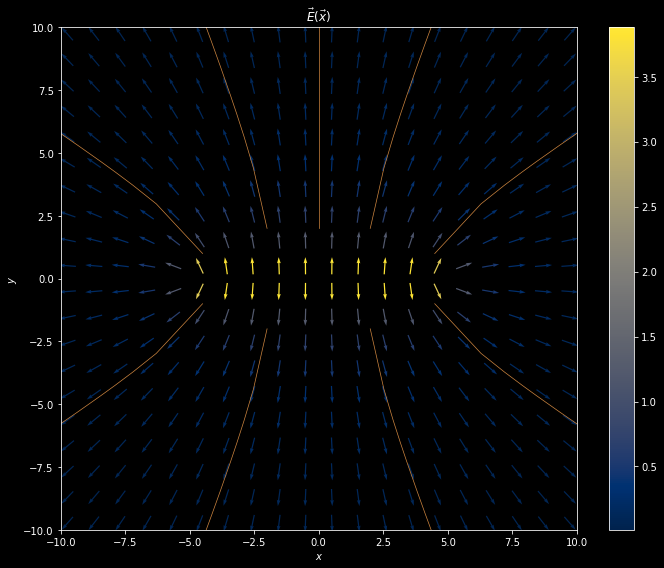

In [49]:
##LINEAS DE CAMPO##

def f(XX, t):
    x, y = XX 
    dxdt = Ex(x,y)
    dydt = Ey(x,y)
    return [dxdt, dydt]

t = np.linspace(0,5000,1000)
X0 = [[0,2],[-2,-2],[-4.5,-1],[-2,2],[-4.5,1],[2,-2],[4.5,-1],[2,2],[4.5,1]]  #condiciones iniciales representativas

plt.figure(figsize=(10,8))
for i in X0:
    if i != X0[-1]: 
        XSol = odeint(f,i,t)  #soluciones numéricas para el campo eléctrico
        xsol = XSol[:,0]
        ysol = XSol[:,1]
        plt.plot(xsol,ysol,color='peru', lw=0.7)
    else:
        XSol = odeint(f,i,t) 
        xsol = XSol[:,0]
        ysol = XSol[:,1]
        plt.plot(xsol,ysol,color='peru', lw=0.7,label='Lineas de Campo')


plt.quiver(x,y, Ex(x,y)/E(x,y),Ey(x,y)/E(x,y),E(x,y), scale=30, pivot='middle', cmap= 'cividis')
plt.ylabel(r'$y$')
plt.xlabel(r'$x$')
plt.colorbar()
plt.xlim(-10,10)#limites arbitrarios para una mejor visualización del campo
plt.ylim(-10,10)
plt.title(r'$\vec{E}(\vec{x})$')
plt.tight_layout()
plt.savefig('ejercicio5.pdf', format='pdf', dpi=300)
plt.show()

## Ejercicio 6
Calculamos las curvas equipotenciales con la función contour de matplotlib y las ploteamos encima de los gráficos anteriores.

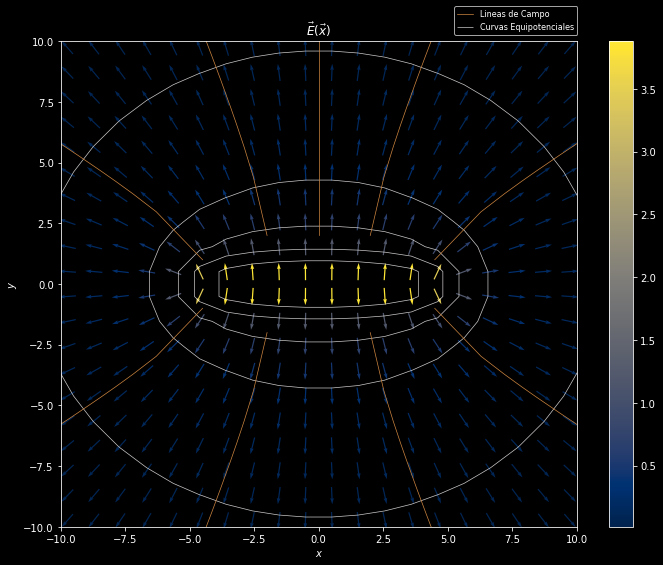

In [50]:
##CURVAS EQUIPOTENCIALES

plt.figure(figsize=(10,8))
def P(x):
    return np.log(((x-(L/2) + ((x-(L/2))**2 +y**2)**(1/2))))-np.log(((x+(L/2) + ((x+(L/2))**2 +y**2)**(1/2))))

CS=plt.contour(x,y,P(x),levels=5, colors='snow', linestyles='-', linewidths=0.7, alpha=0.8)
CS.collections[0].set_label('Curvas Equipotenciales')


for i in X0:
    if i != X0[-1]: 
        XSol = odeint(f,i,t)  #solucion
        xsol = XSol[:,0]
        ysol = XSol[:,1]
        plt.plot(xsol,ysol,color='peru', lw=0.7)
    else:
        XSol = odeint(f,i,t)  #solucion
        xsol = XSol[:,0]
        ysol = XSol[:,1]
        plt.plot(xsol,ysol,color='peru', lw=0.7,label='Lineas de Campo')


plt.quiver(x,y, Ex(x,y)/E(x,y),Ey(x,y)/E(x,y),E(x,y), scale=30, pivot='middle', cmap= 'cividis')
plt.ylabel(r'$y$')
plt.xlabel(r'$x$')
plt.colorbar()
plt.tight_layout()
plt.xlim(-10,10)#limites arbitrarios para una mejor visualización del campo
plt.ylim(-10,10)
plt.title(r'$\vec{E}(\vec{x})$')
plt.legend(bbox_to_anchor = (0.755, 1.08),fontsize=8)
plt.tight_layout()
plt.savefig('ejercicio6.pdf', format='pdf', dpi=300)
plt.show()

## Ejercicio 7

Ahora pasemos a calcular el límite de cuando $L \rightarrow \infty$. Para esto utilizamos el módulo sympy y, en consecuencia, los símbolos definidos al inicio.

In [51]:
#definimos nuevamente los símbolos a utilizar ya que con los gráficos cambiaron
x = sp.Symbol('x', real=True)
y = sp.Symbol('y', real=True)
L = sp.Symbol('L', real=True)
x_p = sp.Symbol('x_p', real=True)
#denifimos unos nuevos simbolos para utilizarlos en el calculo del límite al infinito del potencial con un potencial de referencia distinto de 0
x_o =sp.Symbol('x_o', real=True)
y_o = sp.Symbol('y_o', real=True)

In [52]:
#potencial encontrado en la parte 1 reescrito en base a la propiedad de los logarítmos log(a) - log(b) = log(a/b)
phi_ref_0 = sp.ln((x+(L/2)+sp.sqrt(y**2+(x+(L/2))**2))/(x-(L/2)+sp.sqrt(y**2+(x-(L/2))**2))) 
phi_ref_0

log((L/2 + x + sqrt(y**2 + (L/2 + x)**2))/(-L/2 + x + sqrt(y**2 + (-L/2 + x)**2)))

In [53]:
sp.limit(phi_ref_0,L,sp.oo) #límite de L tendiendo a infinito con un potencial de referencia igual a 0

oo

In [54]:
#potencial de nuestra linea de carga con un potencial de referencia distinto de 0
phi_ref_n = sp.log(((x+(L/2)+sp.sqrt(y**2+(x+(L/2))**2))/(x-(L/2)+sp.sqrt(y**2+(x-(L/2))**2)))) - sp.log(((x_o+(L/2)+sp.sqrt(y_o**2+(x_o+(L/2))**2))/(x_o-(L/2)+sp.sqrt(y_o**2+(x_o-(L/2))**2))))
phi_ref_n

log((L/2 + x + sqrt(y**2 + (L/2 + x)**2))/(-L/2 + x + sqrt(y**2 + (-L/2 + x)**2))) - log((L/2 + x_o + sqrt(y_o**2 + (L/2 + x_o)**2))/(-L/2 + x_o + sqrt(y_o**2 + (-L/2 + x_o)**2)))

In [55]:
lim_phi_ref_n=sp.limit(phi_ref_n,L,sp.oo) #límite de L tendiendo a infinito con un potencial de referencia distinto de 0
lim_phi_ref_n

log(y**(-2)) - log(y_o**(-2))

Luego, calculemos el valor del campo eléctrico cuando $L$ tiende a infinito. En particular, calcularemos los valores del límite para cada componente del campo eléctrico.

In [56]:
comp_xx=2/(4*y**2 - 4*L*x + 4*x**2 + 4*L**2)**0.5 - 2/(4*y**2 + 4*L*x + 4*x**2 + 4*L**2)**0.5
comp_xx #visualizamos la componente del campo a la que le sacaremos el límite


2*(4*L**2 - 4*L*x + 4*x**2 + 4*y**2)**(-0.5) - 2*(4*L**2 + 4*L*x + 4*x**2 + 4*y**2)**(-0.5)

In [57]:
sp.limit(comp_xx, L, sp.oo)#limite de la componente x del campo eléctrico

0

In [58]:
comp_yy=y/((x-(L/2))*sp.sqrt((x-(L/2))**2+y**2)+(x-(L/2))**2+y**2) - y/((x+L/2)*sp.sqrt((x+L/2)**2+y**2)+(x+(L/2))**2+y**2)
comp_yy

-y/(y**2 + (L/2 + x)**2 + (L/2 + x)*sqrt(y**2 + (L/2 + x)**2)) + y/(y**2 + (-L/2 + x)**2 + (-L/2 + x)*sqrt(y**2 + (-L/2 + x)**2))

In [59]:
sp.limit(comp_yy, L, sp.oo)#limite de la componente y del campo eléctrico

2/y

## Ejercicio 8

Para finalizar la tarea, graficaremos el caso donde $L$ es muy grande $(L=10000)$ y los ejes son muy pequeños en comparación a $L$, en específico, para  $x\in[-10,10]$ e $y\in[-10,10]$. Para llevar a cabo esta tarea editaremos y juntaremos los bloques realizados en los ejercicios 4 al 6. 

In [60]:
n = 40 #nodos de la grilla
max = 10 #maximo y minimo del grafico

X = np.linspace(-max,max,n)
Y = np.linspace(-max,max,n)
L = 10000  #Largo de la línea de carga

x,y = np.meshgrid(X,Y)

In [61]:
def Ex(x,y): #componente x del campo
    return ((-0.5*L + 1.0*x)*(y**2 + (-L/2 + x)**2)**(-0.5) + 1)/(-L/2 + x + (y**2 + (-L/2 + x)**2)**0.5) - ((0.5*L + 1.0*x)*(y**2 + (L/2 + x)**2)**(-0.5) + 1)/(L/2 + x + (y**2 + (L/2 + x)**2)**0.5)
    #la expresión anterior se obtiene al hacer que el output de sympy nos de la expresión para el campo en un texto 'plano'

def Ey(x,y): #componente y del campo
    return 1.0*y*(y**2 + (-L/2 + x)**2)**(-0.5)/(-L/2 + x + (y**2 + (-L/2 + x)**2)**0.5) - 1.0*y*(y**2 + (L/2 + x)**2)**(-0.5)/(L/2 + x + (y**2 + (L/2 + x)**2)**0.5)

def E(x,y): #normalización
    return np.sqrt((Ex(x,y))**2 + (Ey(x,y))**2)

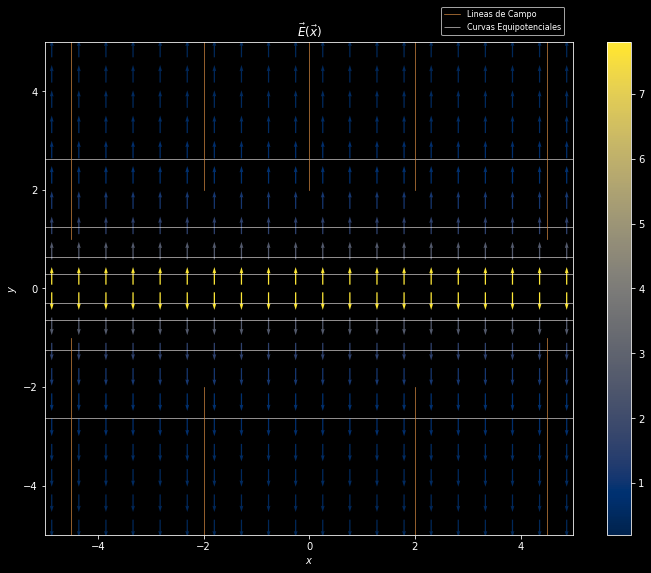

In [62]:
plt.figure(figsize=(10,8))
for i in X0:
    if i != X0[-1]: 
        XSol = odeint(f,i,t)  #soluciones numéricas para el campo eléctrico
        xsol = XSol[:,0]
        ysol = XSol[:,1]
        plt.plot(xsol,ysol,color='peru', lw=0.7)
    else:
        XSol = odeint(f,i,t) 
        xsol = XSol[:,0]
        ysol = XSol[:,1]
        plt.plot(xsol,ysol,color='peru', lw=0.7,label='Lineas de Campo')

def P(x):
    return np.log(((x-(L/2) + ((x-(L/2))**2 +y**2)**(1/2))))-np.log(((x+(L/2) + ((x+(L/2))**2 +y**2)**(1/2))))

CS=plt.contour(x,y,P(x),levels=5, colors='snow', linestyles='-', linewidths=0.7, alpha=0.8)
CS.collections[0].set_label('Curvas Equipotenciales')
plt.quiver(x,y, Ex(x,y)/E(x,y),Ey(x,y)/E(x,y),E(x,y), scale=30, pivot='middle', cmap= 'cividis')
plt.ylabel(r'$y$')
plt.xlabel(r'$x$')
plt.colorbar()
plt.xlim(-5,5)#limites arbitrarios para una mejor visualización del campo
plt.ylim(-5,5)
plt.title(r'$\vec{E}(\vec{x})$')
plt.legend(bbox_to_anchor = (0.866, 1.08),fontsize=8)
plt.tight_layout()
plt.savefig('ejercicio8.pdf', format='pdf', dpi=300)